In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
mkt_data = pd.read_csv(r'C:\Users\mannu\Desktop\bank.csv')

In [3]:
# First view
mkt_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Checking for null values
mkt_data.isnull().sum().sum()

0

In [5]:
# finding qualitative and quantitative columns
quant_columns = []
qual_columns = []
for column in mkt_data.columns:
    if mkt_data[column].dtype == 'int64':
        quant_columns.append(column)
    else:
        qual_columns.append(column)
print(f' There are {len(quant_columns)} Quantitative columns, namely: {quant_columns}')
print(f'There are {len(qual_columns)} Qualitative columns, namely: {qual_columns}')

 There are 7 Quantitative columns, namely: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
There are 10 Qualitative columns, namely: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [6]:
# A high level review of quantitative columns:
mkt_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<br>

- #### The mean age is 41 with a standard deviation of 11~12 

<br>

In [7]:
# High level view of unique values in qualitative columns:
for names in qual_columns:
    print(f'{names.upper()}:{mkt_data[names].unique()}')

JOB:['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
MARITAL:['married' 'single' 'divorced']
EDUCATION:['secondary' 'tertiary' 'primary' 'unknown']
DEFAULT:['no' 'yes']
HOUSING:['yes' 'no']
LOAN:['no' 'yes']
CONTACT:['unknown' 'cellular' 'telephone']
MONTH:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
POUTCOME:['unknown' 'other' 'failure' 'success']
DEPOSIT:['yes' 'no']


In [8]:
# Binary Columns:
for names in qual_columns:
    if mkt_data[names].nunique() == 2:
        print(names)

default
housing
loan
deposit


#### To get a feel of data we use distribution plots for quantitative values

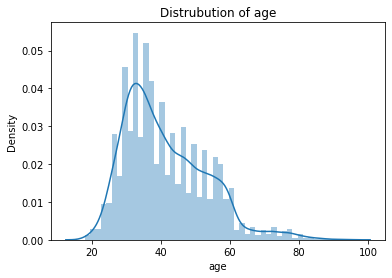

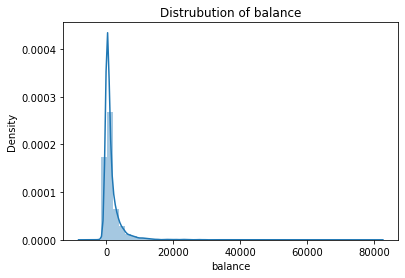

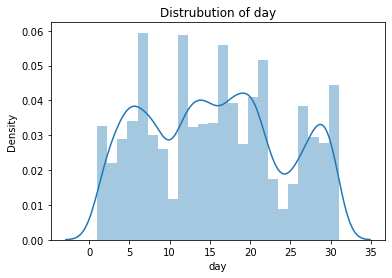

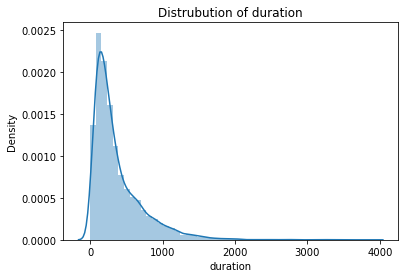

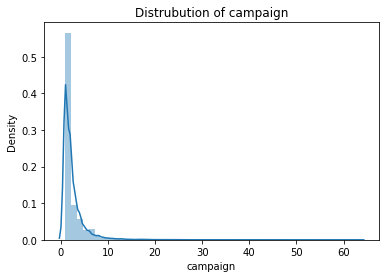

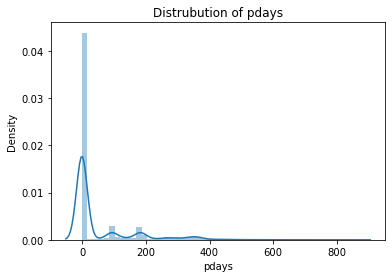

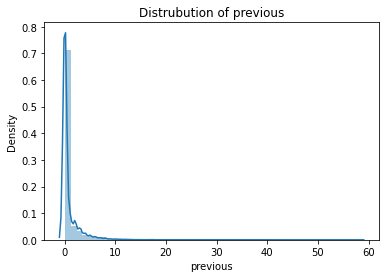

In [9]:
for column in quant_columns:
    sns.distplot(mkt_data[column])
    plt.title(f'Distrubution of {column}')
    plt.show()

In [10]:
# Finding overall conversion rate for marketing campaign
len((mkt_data[mkt_data['poutcome'] == 'success']))/len(mkt_data) * 100

9.595054649704354

- #### Over-all conversion rate is low.
    - However this is mis-leading, since there are unknown values in poutcome column, which means that these audiences' decisions are not known and that may be due to many reasons

- #### To fix this, I will create a sub-database of where values in poutcome are either success or failure.

In [11]:
known_mkt_data = mkt_data[mkt_data['poutcome'].isin(['success','failure'])]

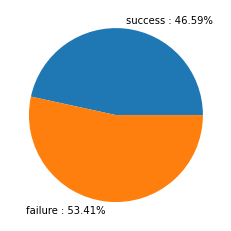

In [12]:
# recalculating overall conversion rate of campaign:
y = [round(len(known_mkt_data[known_mkt_data['poutcome'] == 'success'])/len(known_mkt_data) * 100,2), 
     round(len(known_mkt_data[known_mkt_data['poutcome'] == 'failure'])/len(known_mkt_data) * 100,2)]
labels_known = [f'success : {round(y[0],2)}%',f'failure : {round(y[1],2)}%']
plt.pie(y,labels = labels_known)
plt.show()

- ## Methodology:
    - > #### I will Analyze the data on known marketing dataset i,e dataset with only success and failure values which will allow me to find actionable insights as to what are the markers of audiences which are contributing to a higher conversion rate.

In [13]:
# Splitting data on the bases of poutcomes for simplicity:
success_data = known_mkt_data[known_mkt_data['poutcome'] == 'success']
failure_data = known_mkt_data[known_mkt_data['poutcome'] == 'failure']
                              

- #### Calculating conversion rates for unique values in qualitative columns to find trends.

### 1. Job

In [14]:
# Finding out Conversion Rates grouped by job types.
job_conv = (success_data.groupby('job').count()['poutcome']
            /
            known_mkt_data.groupby('job').count()['poutcome'] * 100).sort_values(ascending = False).reset_index()

In [15]:
job_conv

,job,poutcome
0,retired,64.903846
1,student,60.909091
2,unemployed,59.770115
3,unknown,55.555556
4,housemaid,51.162791
5,self-employed,50.000000
6,management,49.914530
7,technician,43.013699
8,admin.,42.006270
9,services,38.509317


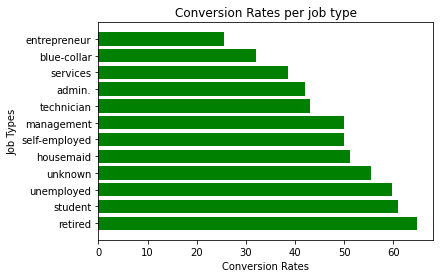

In [16]:
plt.barh(job_conv['job'],width=job_conv['poutcome'], color = 'g')
plt.ylabel('Job Types')
plt.xlabel('Conversion Rates')
plt.title('Conversion Rates per job type')
plt.show()

- #### Job type has a high correlation and is following a trend, to capture this trend I will create a dataframe of best performing jobs which have a conversation rate that is higher than overall conversion rate.

In [17]:
#Filtering out job types that have a higher than normal conversion rate.
job_targets = job_conv[job_conv['poutcome'] >= 
                       (len(known_mkt_data[known_mkt_data['poutcome'] == 'success'])/len(known_mkt_data) * 100)]

In [18]:
job_targets

,job,poutcome
0,retired,64.903846
1,student,60.909091
2,unemployed,59.770115
3,unknown,55.555556
4,housemaid,51.162791
5,self-employed,50.000000
6,management,49.914530


### 2. Marital Status

In [19]:
#Calculating Conversion Rates grouped by Marital Status
marital_conv = ((success_data.groupby('marital').count()['poutcome']
                /
                known_mkt_data.groupby('marital').count()['poutcome']) * 100).sort_values(ascending= False).reset_index()

In [20]:
marital_conv

,marital,poutcome
0,divorced,48.165138
1,single,48.067010
2,married,45.440613


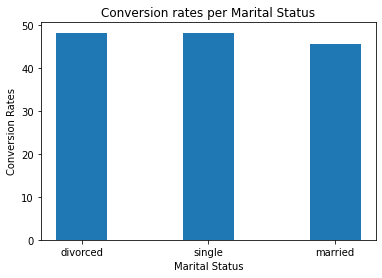

In [21]:
plt.bar(marital_conv['marital'],marital_conv['poutcome'],width = 0.4)
plt.xlabel('Marital Status')
plt.ylabel('Conversion Rates')
plt.title('Conversion rates per Marital Status')
plt.show()

- #### Marital Status does not indicate any substantial correlation to conversion rates.

### 3. Education

In [22]:
# Calculating Conversion Rates grouped by Education Level/Type.
edu_conv = ((success_data.groupby('education').count()['poutcome']
             /
             known_mkt_data.groupby('education').count()['poutcome']) * 100).sort_values(ascending= False).reset_index()
edu_conv

,education,poutcome
0,unknown,56.074766
1,tertiary,51.146789
2,secondary,43.442623
3,primary,39.639640


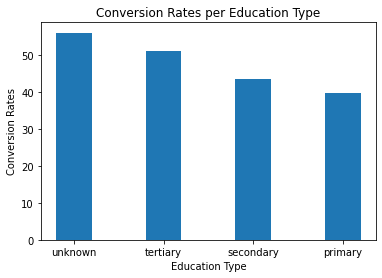

In [23]:
plt.bar(edu_conv['education'],edu_conv['poutcome'],width = 0.4)
plt.xlabel('Education Type')
plt.ylabel('Conversion Rates')
plt.title('Conversion Rates per Education Type')
plt.show()

- #### Since Education has unknown values it cannot be relied upon, however we get to know that people with declared primary education are less likely to respond positively to this marketing campaign, i.e have a negative correlation

### 4.Default- Has a Credit Default.

In [24]:
# Calculating Conversion Rates grouped by Default/Credit Default.
default_conv = ((success_data.groupby('default').count()['poutcome']
                /
                known_mkt_data.groupby('default').count()['poutcome']) * 100).sort_values(ascending= False).reset_index()
default_conv

,default,poutcome
0,no,46.748145
1,yes,NaN


In [25]:
known_mkt_data.groupby('default').count()['poutcome']

default
no     2291
yes       8
Name: poutcome, dtype: int64

In [26]:
success_data.groupby('default').count()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
default,,,,,,,,,,,,,,,,
no,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071


- #### Having a credit default is inconclusive, i.e. more data is required to see it's effect correctly, however there are absolutely no people who have both responded positively to marketing campaign and have a credit default.

### 5. Housing, whether person has a house or is on rent

In [27]:
# Calculating Conversion Rates on criteria whether a person is a house-owner or not.
housing_conv = ((success_data.groupby('housing').count()['poutcome']
                 /
                 known_mkt_data.groupby('housing').count()['poutcome']) * 100).sort_values(ascending= False).reset_index()

In [28]:
housing_conv

,housing,poutcome
0,no,61.466459
1,yes,27.826942


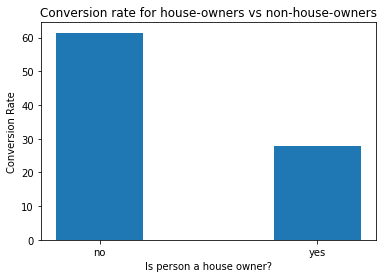

In [29]:
plt.bar(housing_conv['housing'],housing_conv['poutcome'],width = 0.4)
plt.xlabel('Is person a house owner?')
plt.ylabel('Conversion Rate')
plt.title('Conversion rate for house-owners vs non-house-owners')
plt.show()

- #### Not being a house owner has a high positive correlation to conversion rates.

### 6. Loan: If the person has a loan or not

In [30]:
# Calculating Conversion Rates on criteria of whether a person has a loan or not
loan_conv = ((success_data.groupby('loan').count()['poutcome']
              /
              known_mkt_data.groupby('loan').count()['poutcome']) * 100 ).sort_values(ascending = False).reset_index()

In [31]:
loan_conv

,loan,poutcome
0,no,49.038462
1,yes,23.287671


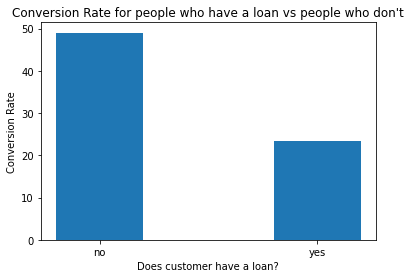

In [32]:
plt.bar(loan_conv['loan'], loan_conv['poutcome'],width = 0.4)
plt.xlabel('Does customer have a loan?')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate for people who have a loan vs people who don\'t')
plt.show()

- #### People who don't have a loan are not affecting the conversion-rate in a way that is significant, however people who have a loan are doing so negatively.

### 7. Mode of contact

In [33]:
# Calculating conversion rates for different mode of contacts.
contact_conv = ((success_data.groupby('contact').count()['poutcome']
                 /
                 known_mkt_data.groupby('contact').count()['poutcome']) * 100 ).sort_values(ascending = False).reset_index()
contact_conv

,contact,poutcome
0,telephone,51.829268
1,unknown,50.000000
2,cellular,46.161093


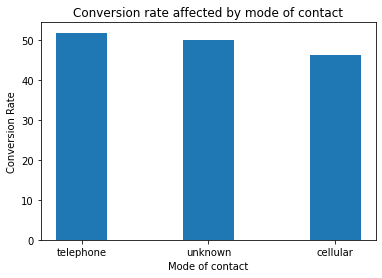

In [34]:
plt.bar(contact_conv['contact'],contact_conv['poutcome'],width=0.4)
plt.xlabel('Mode of contact')
plt.ylabel('Conversion Rate')
plt.title('Conversion rate affected by mode of contact')
plt.show()

- #### Despite there being an unknown value mode of contact shows no statistical value.

### 8. Time of year/Season/Month

In [35]:
# Calculating conversion rates for different months
month_conv = ((success_data.groupby('month').count()['poutcome']
               /
               known_mkt_data.groupby('month').count()['poutcome']) * 100).sort_values(ascending = False).reset_index()
month_conv['month']

0     dec
1     sep
2     jun
3     jul
4     mar
5     aug
6     oct
7     jan
8     feb
9     nov
10    apr
11    may
Name: month, dtype: object

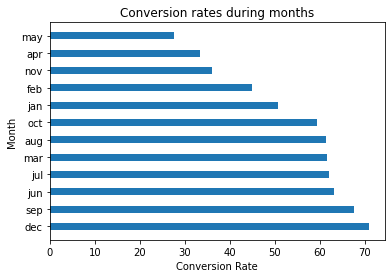

In [36]:
plt.barh(month_conv['month'],month_conv['poutcome'], height = 0.4)
plt.ylabel('Month')
plt.xlabel('Conversion Rate')
plt.title('Conversion rates during months')
plt.show()

- #### Best time to contact for campaign is during holiday season.

# Summary:
 - ### Insights:
     - #### In relation to job it was found that there are certain jobs types that trend the conversion rate above the overall conversion rate.
     - #### In relation to housing and loans:
         - #### People who do not have a house tend to respond positively.
         - #### People who have an ongoing loan tend to respond negatively.
     - #### In relation to Defaulters:
         - #### Inconclusive
     - #### Marital Status, Education, and Mode of contact are not signifact enough to affect the target audience.
     - #### Best time to contact people is the Holiday Season
 - ### Recommendations for maximizing conversion rates:
     - #### Prioritize contacting people who are from these job types:
         - retired
         - student
         - unemployed
         - housemaid
         - self-employed
         - management
     - #### Prioritize contacting people who do not own a house
     - #### Do not contact people who have a loan
     - #### Make the most contacts in Holiday Seasons
## Along with recommendations I will create a sub-set of original data for our marketing team to use.
     

In [37]:
data_use_mkt = mkt_data[~mkt_data['poutcome'].isin(['success','failure'])]

In [38]:
data_use_mkt = data_use_mkt[(data_use_mkt['job'].isin(job_targets['job'])) | (data_use_mkt['housing'] == 'no') & (data_use_mkt['loan'] == 'yes')]

In [39]:
data_use_mkt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
12,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
15,35,management,divorced,tertiary,no,3837,yes,no,unknown,8,may,1084,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no
11147,44,unemployed,married,secondary,no,0,no,no,cellular,21,nov,175,4,-1,0,unknown,no
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown,no
11151,40,management,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [40]:
# Performing a test check on known data to see if insights increase the conversion rate:
test_data = known_mkt_data[(known_mkt_data['job'].isin(job_targets['job'])) | (known_mkt_data['housing'] == 'no') & (known_mkt_data['loan'] == 'no')]

In [41]:
rate_compare = test_data.groupby('poutcome').count()['deposit']/len(test_data) * 100

In [42]:
rate_compare = rate_compare.reset_index()

In [43]:
rate_compare.rename(columns = {'deposit':'Conv_rates_post_analysis'}, inplace = True)

In [44]:
rate_compare['Conv_rates_before_analysis'] = (known_mkt_data.groupby('poutcome').count()['deposit']/len(known_mkt_data) * 100).reset_index()['deposit']

In [45]:
rate_compare

,poutcome,Conv_rates_post_analysis,Conv_rates_before_analysis
0,failure,43.734015,53.414528
1,success,56.265985,46.585472


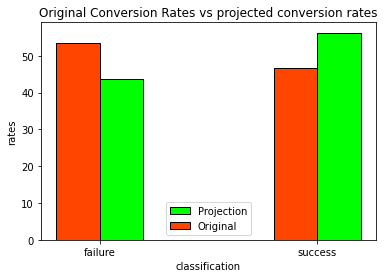

In [46]:
plt.bar(rate_compare['poutcome'], height = rate_compare['Conv_rates_post_analysis'], width = 0.2, color = 'lime', edgecolor = 'black', align = 'edge')
plt.bar(rate_compare['poutcome'], height = rate_compare['Conv_rates_before_analysis'], width = -0.2, color = 'orangered', edgecolor = 'black', align='edge')
plt.xlabel('classification')
plt.ylabel('rates')
plt.title('Original Conversion Rates vs projected conversion rates') 
plt.legend(['Projection','Original'])
plt.show()

- #### While the Original Conversion rate was around 46%, the projected conversion rate is 56 % and as a result marketing campaign can go a lot smoother